In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2


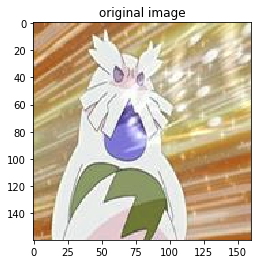

In [3]:
datadir = cv2.imread("./dataset/Abomasnow/Abomasnow_1.jpg")

# resize the image



plt.imshow(datadir), plt.title("original image")

plt.show()


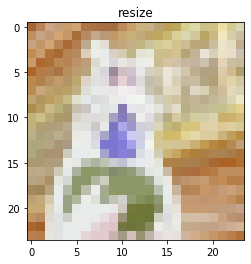

In [4]:
res = cv2.resize(datadir,(24, 24), interpolation = cv2.INTER_AREA)
plt.imshow(res), plt.title("resize")
plt.show()

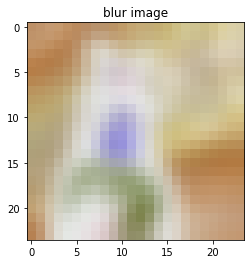

In [5]:
res = cv2.GaussianBlur(res, (5,5), 0)
plt.imshow(res), plt.title("blur image")
plt.show()

(<matplotlib.image.AxesImage at 0x1e25275bd88>,
 Text(0.5, 1.0, 'image segmentation'))

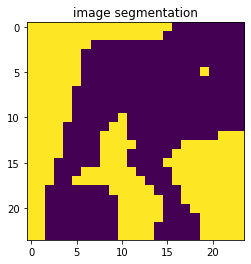

In [6]:
gray = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
_, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(threshold), plt.title("image segmentation")

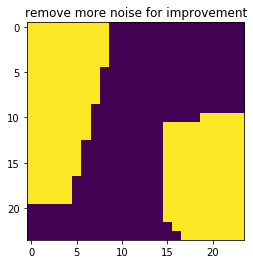

In [7]:
kernel = np.ones((3,3), np.uint8)
# clean more noise
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations = 2)

# 
confirm_bg = cv2.dilate(opening, kernel,  iterations = 2)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(confirm_bg, sure_fg)

plt.imshow(confirm_bg), plt.title("remove more noise for improvement")
plt.show()




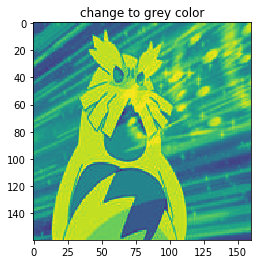

In [11]:
grey = cv2.cvtColor(datadir,cv2.COLOR_BGR2GRAY)
plt.imshow(grey), plt.title("change to grey color")
plt.show()


In [ ]:
#  the above code is the sample of image preprocessing before modelling phase. 